#YOLO ALGORITHM IMPLEMENTATION

In [1]:
pip install opencv-python

In [2]:
import requests

# Download YOLOv3 weights
url_weights = "https://pjreddie.com/media/files/yolov3.weights"
response_weights = requests.get(url_weights)

with open("yolov3.weights", "wb") as f:
    f.write(response_weights.content)

# Download YOLOv3 configuration file
url_cfg = "https://github.com/pjreddie/darknet/blob/master/cfg/yolov3.cfg?raw=true"
response_cfg = requests.get(url_cfg)

with open("yolov3.cfg", "wb") as f:
    f.write(response_cfg.content)

# Download YOLOv3 class names
url_names = "https://github.com/pjreddie/darknet/blob/master/data/coco.names?raw=true"
response_names = requests.get(url_names)

with open("coco.names", "wb") as f:
    f.write(response_names.content)

In [3]:
import cv2
import numpy as np

net = cv2.dnn.readNet("yolov3.weights", "yolov3.cfg")
classes = []
with open("coco.names", "r") as f:
    classes = [line.strip() for line in f.readlines()]
layer_names = net.getUnconnectedOutLayersNames()

Image path: road.jpeg


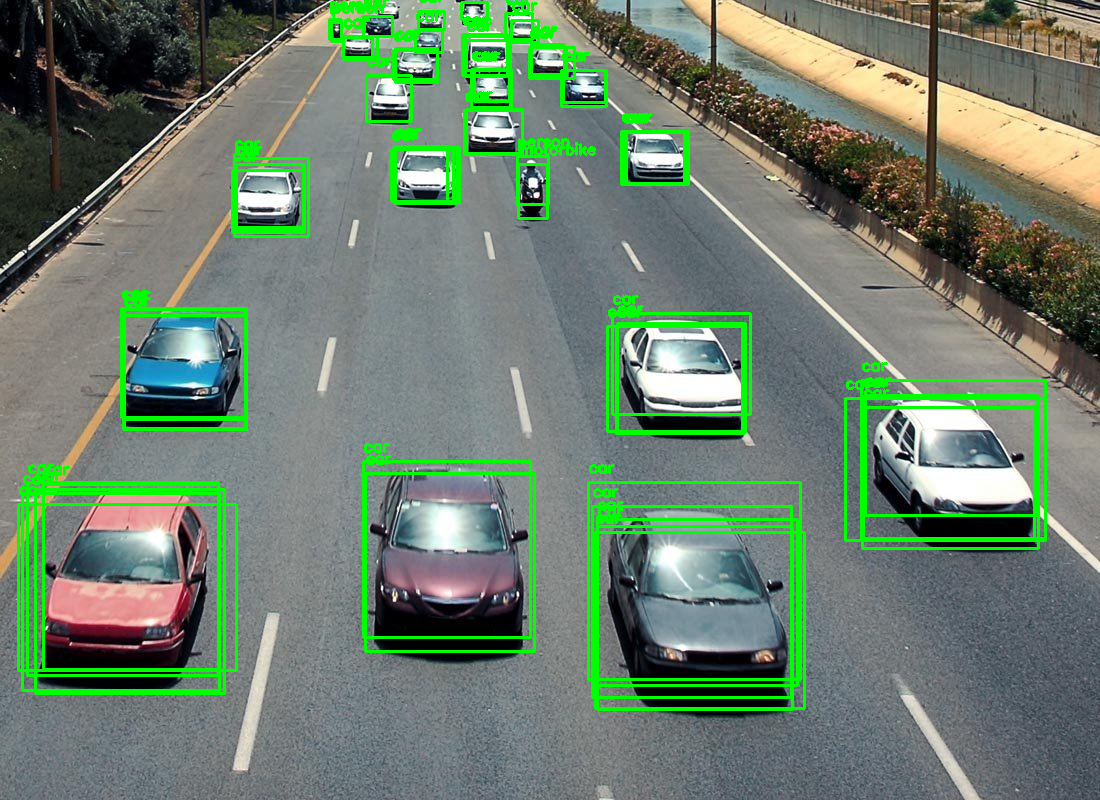

In [5]:
from IPython.display import Image, display

def detect_objects(image_path):
    # Print the image path to verify
    print(f"Image path: {image_path}")

    img = cv2.imread(image_path)

    if img is None:
        print("Failed to load image. Please check the file path and format.")
        return

    height, width, _ = img.shape
    blob = cv2.dnn.blobFromImage(img, 0.00392, (416, 416), (0, 0, 0), True, crop=False)
    net.setInput(blob)
    outs = net.forward(layer_names)

    for out in outs:
        for detection in out:
            scores = detection[5:]
            class_id = np.argmax(scores)
            confidence = scores[class_id]
            if confidence > 0.5:
                center_x, center_y, w, h = (detection[:4] * np.array([width, height, width, height])).astype(int)
                x, y = int(center_x - w / 2), int(center_y - h / 2)
                cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)
                cv2.putText(img, classes[class_id], (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

    _, img_png = cv2.imencode('.png', img)
    display(Image(data=img_png.tobytes()))

# Specify the path to your image
image_path = "road.jpeg"
detect_objects(image_path)

Image path: cutie_puppie.jpeg


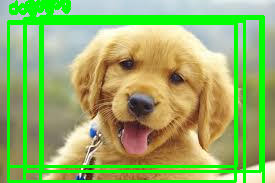

In [7]:
# Specify the path to your image
image_path = "cutie_puppie.jpeg"
detect_objects(image_path)

Image path: street.jpg


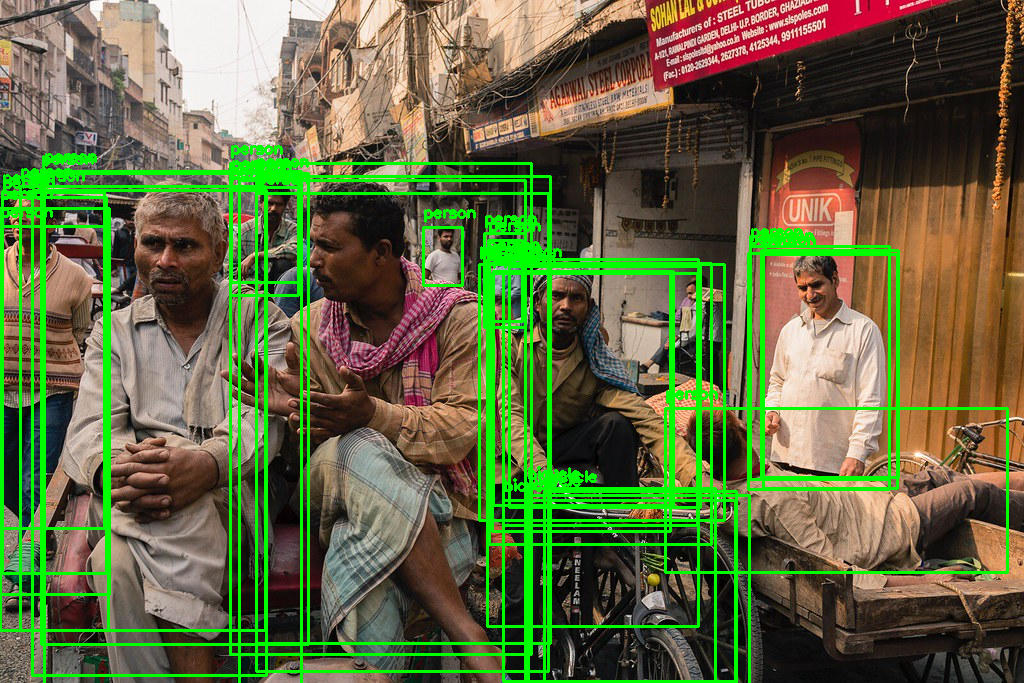

In [8]:
# Specify the path to your image
image_path = "street.jpg"
detect_objects(image_path)